In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def your_code_here():
    return 1

def laplace_mech_sens_1(e, v=200):
    return laplace_mech(v, 1, e)

# Part 1: Laplace Mechanism & Composition

### Question 1 (10 points)
Graph the *empirical probability density function* of the Laplace Mechanism, for a counting query whose answer is `200.0`, at `epsilon` values of `10`, `1`, and `.5`. 

The *empirical probability density function* is the probability density of samples drawn from an underlying distribution. To graph this function for the Laplace Mechanism, draw 10,000 samples from the output distribution of your mechanism, and then graph the frequency of each output value (using a histogram).

*Hint*: use `plt.hist(..., bins=50)` three times to produce the three histograms, one on top of the other.

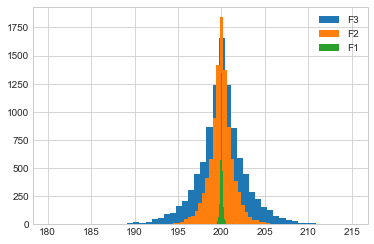

In [22]:
plt.hist([laplace_mech_sens_1(0.5) for i in range(10000)], bins=50, label='F3');
plt.hist([laplace_mech_sens_1(1) for i in range(10000)], bins=50, label='F2');
plt.hist([laplace_mech_sens_1(10) for i in range(10000)], bins=50, label='F1');

plt.legend()

### Question 2 (5 points)
In 2-5 sentences, answer the following:
- What do you observe about the emprical PDF of the Laplace Mechanism when `epsilon` changes?
- What effect does this observation have on privacy?

- As epsilon grows, we see that although we have more values to replace 200 with, the probability that the original value is returned continues to increase. The figure demostrates that values of epsilon too large (e.g., 10) and those too small (0.5) are not the best choice. Somewhere in between is best. The privacy is significatly lower for epsilons 10 and 0.5.

### Question 3 (5 points)

Graph the empirical PDFs for your Laplace Mechanism running the same query on two hypothetical neighboring databases. Imagine that on one database, the query's true answer (i.e. with no noise added) is 200, while on its neighbor, the answer is 201. Use 10,000 samples to build the empirical PDF.

*Hint*: use `plt.hist(..., bins=50)` twice.

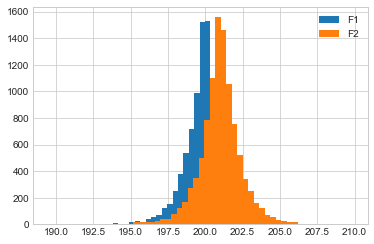

In [23]:
plt.hist([laplace_mech_sens_1(1) for i in range(10000)], bins=50, label='F1');
plt.hist([laplace_mech_sens_1(1, 201) for i in range(10000)], bins=50, label='F2');

plt.legend()

### Question 4 (5 points)

In 2-5 sentences, answer the following:
- What do you observe about the way the two empirical PDFs overlap?
- What effect does the overlap have on privacy?

- It seems as though because epsilon is equal for both functions, we could resonably call them symmetrical and make some further observations and possibly insights. Because the two functions are so similar in shape, with some work we might be able to determine a very close approximation to epsilon and therefore undo all the work done by the differential privacy.

### Question 5 (10 points)

Consider the definition of `mech2` below. Graph the empirical PDF of `mech2` for 10,000 samples and three values of `epsilon`: 10, 1, and 0.5.

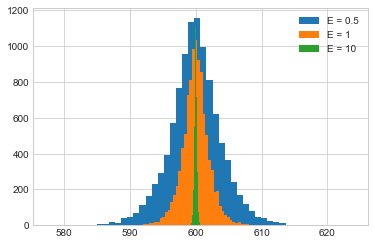

In [24]:
def mech2(epsilon):
    val1 = laplace_mech(200, 1, epsilon)
    val2 = laplace_mech(400, 1, epsilon)
    return val1 + val2

plt.hist([mech2(0.5) for i in range(10000)], bins=50, label='E = 0.5');
plt.hist([mech2(1) for i in range(10000)], bins=50, label='E = 1');
plt.hist([mech2(10) for i in range(10000)], bins=50, label='E = 10');

plt.legend()

### Question 6 (5 points)

In 3-6 sentences, answer the following:
- What is the privacy cost of `mech2`?
- Informally, why is this privacy cost correct?
- Is the shape of `mech2`'s empirical PDF similar to that of `laplace_mech`'s empirical PDF? What does this similarity or lack of similarity mean for privacy?

 - The privacy cost of `mech2` is 2$\epsilon$.
 - This is a differentially private sequential composition. Our output is $G(x) = (F_1(x), F_2(x))$ with both satisfying $F_1(x)$ and $F_2(x)$ satisfy their respective $\epsilon$, resulting in a privacy cost of $\epsilon + \epsilon$.
 - The two shapes are very similar. This means that `mech2` has good privacy, as you would not be able to tell a significant difference between the distributions.

### Question 7 (10 points)

Implement a mechanism `mech_n` that returns the average of `n` differentially private results for a single query.

*Hint*: use `laplace_mech` and `np.mean`.

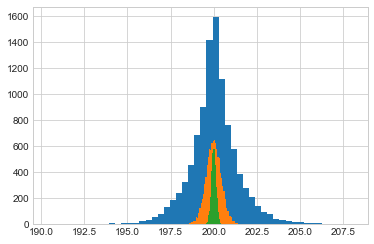

In [25]:
def mech_n(query, epsilon, n):
    return np.mean([laplace_mech(query, 1, epsilon) for i in range(n)])

vals1 = [mech_n(200, 1, 100) for v in range(10000)]
vals2 = [mech_n(200, 1, 10) for v in range(10000)]
vals3 = [mech_n(200, 1, 1) for v in range(10000)]
plt.hist(vals3, bins=50);
plt.hist(vals2, bins=50);
plt.hist(vals1, bins=50);

### Question 8 (5 points)

In 2-5 sentences, answer the following:
- What is the privacy cost of `mech_n`?
- Informally, why is this privacy cost correct?

- The privacy cost of `mech_n` is 1.
- Although the query is run n times, its epsilon value never changes.

# Part 2: Analyzing Real Data

Next we'll examine the effect of differential privacy on some queries over the `adult` dataset that we used for Homework 1. First, we'll read in the data.

In [26]:
adult_data = pd.read_csv("adult_with_pii.csv")
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Question 9 (10 points)

Write code to answer the query: "how many participants have never been married?"

*Hint*: filter the `adult_data` dataframe to contain only participants who were never married, then return the 0th element of the `shape` of the filtered dataframe.

*Hint*: if you have not used Pandas before, [this](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html) comparison with SQL might be useful.

In [27]:
query1 = adult_data[adult_data['Martial Status'] == 'Never-married'].shape[0]
query1

10683

### Question 10 (5 points)

In 2-5 sentences, answer the following:
- What is the sensitivity of the query in the last question, and why?

- The sensitivity is 1 because this is a counting query. Counting queries always have a sensitivity of 1. 

### Question 11 (10 points)

Use your implementation of `laplace_mech` to produce a differentially private answer to your query from the last question, with `epsilon = 0.1`.

In [28]:
def laplace_mech(query, sensitivity, epsilon):
    return query + np.random.laplace(scale= sensitivity / epsilon)

laplace_mech(query1, 1, 0.1)

10704.223342659543

### Question 12 (10 points)

The `pct_error` function, defined below, returns the percent relative error between an original query result and a differentially private result for the same query.

Using your answer to the last question, write code to produce 1000 differentially private answers to the marital status query, with `epsilon = 0.1`. Calculate the percent error for each one of these answers against the original (non-private) answer. Then, graph the distribution of errors using a histogram.

*Hint*: use `plt.hist(..., bins=20)`.

In [29]:
def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

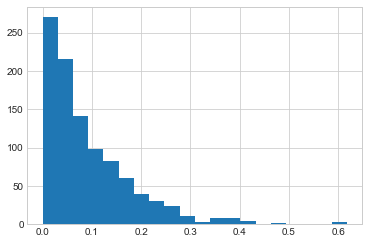

In [30]:
plt.hist([pct_error(query1, laplace_mech(query1, 1, 0.1)) for v in range (1000)], bins=20);

# Part 3: Contingency Tables

### Question 13 (5 points)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [31]:
adult_data['Martial Status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64

### Question 14 (5 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech` above.

In [32]:
list(laplace_mech(q, 1, 0.1) for q in adult_data['Martial Status'].value_counts())

[14968.611905165879,
 10687.72190494619,
 4408.627918354564,
 1005.8026722373654,
 995.2490906120588,
 425.93494506362765,
 20.182058235463668]

### Question 15 (5 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

- The total privacy cost is $\epsilon = 0.1$ becasue this query is a parallel composition of differentially private data.
- If this data is released as an isolated set, then this does not violate privacy because these data points, on their own, do not contain any personally indentifiable information.
- This is not the case for every dataset; a dataset containing details such as addressed or social security numbers would certainly violate privacy if it is released.

### Question 16 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

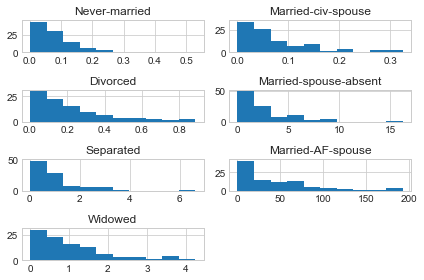

In [33]:
fig = plt.figure()

dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_val = adult_data['Martial Status'].value_counts()[status]
    errors = [pct_error(orig_val, laplace_mech(orig_val, 1, 0.1)) for v in range(100)]
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

### Question 17 (5 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

- `Married-AF-spouse` and `Married-civ-spouse` have the largest and smallest error, respectively.
- This discrepancy is likely due to the magnitude of the data available for each of the two values: `Married-AF-spouse` is a massive value while `Married-civ-spouse` is an extremely small one.
- As the value of your data sample increases, so does the accuracy of a differnetially private version.

### Question 18 (5 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [34]:
pd.crosstab(adult_data['Martial Status'], adult_data['Sex'])

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


### Question 19 (5 points)

Write code to build a differentially private version of your result from the last question.

*Hint*: use `applymap`.

In [35]:
contingency_table = pd.crosstab(adult_data['Martial Status'], adult_data['Sex'])
contingency_table.applymap(lambda x: laplace_mech(x, 1, 0.1))

Sex,Female,Male
Martial Status,,
Divorced,2647.614848,1765.177018
Married-AF-spouse,25.056630,3.108154
Married-civ-spouse,1662.600254,13302.875982
Married-spouse-absent,212.825010,210.546059
Never-married,4774.798126,5914.380388
Separated,616.978188,404.299874
Widowed,826.084123,144.869075


### Question 20 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

*Hint*: use `applymap` and `pct_error` on your answer to the last question.

In [36]:
contingency_table.applymap(lambda x: pct_error(x, laplace_mech(x, 1, 0.1)))

Sex,Female,Male
Martial Status,,
Divorced,0.275302,0.113567
Married-AF-spouse,0.814733,20.259601
Married-civ-spouse,0.203490,0.168758
Married-spouse-absent,0.399283,12.789815
Never-married,0.061304,0.107663
Separated,0.449534,2.835560
Widowed,0.386700,24.288488


### Question 21 (5 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to the last question?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

- The privacy cost is $\epsilon = 0.1$.
- The solution provides accurate results for `Divorced`, `Married-civ-spouse`, `Never-married`, and `Separated`. For these, we get errors of possibly less than 1%. All others have higer errors, with `Married-AF-spouse` having a massive error, up to 300%.

### Question 22 (10 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [37]:
tabs = (pd.crosstab([adult_data['Martial Status'], adult_data['Sex']], adult_data['Education'])).applymap(lambda x: laplace_mech(x, 1, 0.1))
display(tabs)
errors = tabs.applymap(lambda x: pct_error(x, laplace_mech(x, 1, 0.1)))
display(errors)

Education                           10th        11th        12th    1st-4th  \
Martial Status        Sex                                                     
Divorced              Female   66.042483   81.852902   13.308629   0.158814   
                      Male     44.893786   63.703516   18.224527  15.444185   
Married-AF-spouse     Female    1.078832  -20.528481   -6.800809 -16.544654   
                      Male    -14.270820  -14.279917   -4.475507  25.379179   
Married-civ-spouse    Female   46.738826   30.133336   15.617545  10.667427   
                      Male    321.998412  308.479560  118.311339  60.097826   
Married-spouse-absent Female    8.675331    8.298467   27.413240  25.005203   
                      Male     36.523941   15.195386   13.341834 -30.174690   
Never-married         Female  129.778798  257.389137   82.298317  13.571038   
                      Male    250.411387  324.054968  133.901602  27.568457   
Separated             Female   23.922552   20.954115   11.566884   9.831461   
                      Male     10.200345   34.865539  -10.845111   4.595914   
Widowed               Female   27.378897   40.612862   18.085769  14.582396   
                      Male      8.866641    3.485737    6.339689   6.878229   

Education                        5th-6th     7th-8th         9th  Assoc-acdm  \
Martial Status        Sex                                                      
Divorced              Female    7.762882   31.866127   48.702310  115.087080   
                      Male      8.703983   27.508744   51.659880   47.104249   
Married-AF-spouse     Female  -13.928713   -7.717310   -0.055259   64.709783   
                      Male     11.280968    3.665714   25.875608    1.333637   
Married-civ-spouse    Female   19.702347    5.535925   33.630948   77.257374   
                      Male    165.381679  328.221126  208.107266  384.666223   
Married-spouse-absent Female   -2.766211   -2.446072    1.160067   33.929511   
                      Male     19.353824   -0.725312   14.437170  -39.535808   
Never-married         Female   10.732019   43.153060   44.425281  161.990893   
                      Male     57.766733   63.695494  115.224224  170.648364   
Separated             Female   14.740638   23.228158   27.826413    3.798491   
                      Male    -51.805142   23.651999    4.860473   42.600484   
Widowed               Female    4.486300   44.474814   11.581006    7.185229   
                      Male      4.205784    6.503639    9.565703  -11.208364   

Education                      Assoc-voc    Bachelors   Doctorate  \
Martial Status        Sex                                           
Divorced              Female  156.428965   294.507845   21.423380   
                      Male     81.698200   263.255973   15.983707   
Married-AF-spouse     Female    1.180959    -4.496596   -1.628549   
                      Male      9.366472    14.746503   -3.624052   
Married-civ-spouse    Female   91.331593   297.318109   49.869781   
                      Male    597.003557  2469.517530  232.634452   
Married-spouse-absent Female   -5.416180    40.565458   -1.177218   
                      Male     25.642551    31.176107  -12.783011   
Never-married         Female  175.652699   863.440673   30.399865   
                      Male    187.474439   927.922877   40.281042   
Separated             Female  -28.225242    34.686566    2.810706   
                      Male     20.188589    57.881694   -0.762280   
Widowed               Female   49.666063    32.734537   -9.603036   
                      Male     40.294240    25.470305   18.383846   

Education                         HS-grad     Masters  Preschool  Prof-school  \
Martial Status        Sex                                                       
Divorced              Female   938.655369  131.044480   1.015846    28.060903   
                      Male     761.162667   77.363142 -19.605849    31.163429   
Married-AF-spouse     Fem

Education                            10th        11th        12th  \
Martial Status        Sex                                           
Divorced              Female    42.050116   37.930777   78.993129   
                      Male      37.894049    2.186069    3.486717   
Married-AF-spouse     Female  2471.397300  -25.582749 -181.162278   
                      Male     -46.433118  -45.212396 -283.936368   
Married-civ-spouse    Female    20.792215    6.802745   30.297890   
                      Male       0.027334    2.251331    9.833971   
Married-spouse-absent Female    60.763770  130.608714    0.323967   
                      Male       0.502482   95.135686   29.472912   
Never-married         Female     2.300589    0.922451    8.844981   
                      Male       2.171025    5.051426    6.996033   
Separated             Female     8.875434    9.109322   14.073133   
                      Male     360.035140    4.548402   -3.859018   
Widowed               Female    51.894311   16.126991   39.266016   
                      Male       6.801817  863.764631   40.367025   

Education                         1st-4th     5th-6th     7th-8th  \
Martial Status        Sex                                           
Divorced              Female  2267.993658  560.180904   26.109312   
                      Male      57.571492  238.688152   60.145389   
Married-AF-spouse     Female   -67.605815  -46.110304 -118.611698   
                      Male      70.586776  268.617487  219.994697   
Married-civ-spouse    Female   126.888808   12.495104  500.476325   
                      Male      22.487857    1.892954    2.615954   
Married-spouse-absent Female    13.849047 -249.202291  -48.445526   
                      Male     -39.556819   92.137186 -743.599953   
Never-married         Female     8.595735   73.480998   36.955223   
                      Male      98.663189    9.365176   49.461151   
Separated             Female    62.411683    5.208608  115.813190   
                      Male     271.375609  -10.254676   14.853455   
Widowed               Female    66.230067  278.541749    6.634117   
                      Male      46.195120  318.521299  474.244518   

Education                             9th  Assoc-acdm    Assoc-voc  Bachelors  \
Martial Status        Sex                                                       
Divorced              Female    16.604660    2.912987    14.697332  19.345169   
                      Male       1.094199   26.224770     4.484326   5.609218   
Married-AF-spouse     Female -4551.859388   25.531256  1241.911245 -40.264246   
                      Male       7.735470  248.337305    10.426661  76.769779   
Married-civ-spouse    Female    71.605484    3.512232     1.730075   0.105345   
                      Male       3.456175    0.985335     0.932440   0.170393   
Married-spouse-absent Female  1378.360029   89.529269   -37.745131  10.442608   
                      Male      22.919125   -2.289311    32.746434   1.219841   
Never-married         Female     2.158018   17.789842     1.957569   0.206548   
                      Male       2.933228    1.436470     4.486644   0.361509   
Separated             Female    45.239042  103.050137   -18.483649  20.696110   
                      Male      36.296600    8.248661    36.886490   3.688114   
Widowed               Female    80.216335   94.212145    11.484845  46.047410   
                      Male      42.205719 -127.811398    27.694522  62.633140   

Education                       Doctorate      HS-grad       Masters  \
Martial Status        Sex                                              
Divorced              Female     6.287524     0.622228      0.962417   
                      Male      30.733073     0.384658      6.432554   
Married-AF-spouse     Female  -120.585096     9.694839    246.838963   
                      Male     -99.381470 -2062.375755   -200.317788   
Married-civ-spouse    Female    10.181878     3.999473      4

### Question 23 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in the last question? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in the last question different from the privacy cost in Question 19? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

- Because this is a sequential composition of differentially private data with $\epsilon = 0.1$, the privacy cost is $\epsilon$.
- The privacy cost is not different. This is parallel composition: the Laplace mechanism is applied and observed, not combined amongst the entirety of the dataset.
- The number of variables has no effect on the privacy cost, as we are performing a parallel composition; we are able to split the data into disjoint chunks and run mechanisms to apply differential privacy separately.
- Accuracy is indeed affected. If our dataset is relatively small, we will have many chunks with small values. Thus, our differentially private mechanism will produce inaccurate results. The greater the number of small chunks, the greater the inaccuracy.